In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, linregress
from scipy.stats import genextreme as gev

### 1. Descriptive Statistics Analysis (Summary Statistics)
This code calculates summary statistics (mean, median, standard deviation, skewness, kurtosis) for annual maxima values across stations.

In [2]:
# Load the dataset
data = pd.read_csv("HYADES.csv")

# Calculate descriptive statistics for annual maxima by station
summary_stats = data.groupby("ID")["MAX.PRCP"].agg(
    ['mean', 'median', 'std', skew, kurtosis]
).reset_index()

print("Summary Statistics by Station:")
print(summary_stats)

Summary Statistics by Station:
                ID       mean  median        std      skew  kurtosis
0      AEM00041218  23.672727   13.00  28.300321       NaN       NaN
1      AG000060680  16.637931   15.00  10.044984       NaN       NaN
2      AGE00135039  39.997297   35.00  18.068673       NaN       NaN
3      AGE00147704  48.270370   46.00  13.706001       NaN       NaN
4      AGE00147705  56.693333   54.90  21.543522       NaN       NaN
...            ...        ...     ...        ...       ...       ...
39201  ZI000067889  85.133333   71.35  37.368619       NaN       NaN
39202  ZI000067965  59.070370   55.60  25.406523  1.807229  4.285255
39203  ZI000067969  61.562963   60.20  24.938727  0.018273 -0.830894
39204  ZI000067977  75.645000   68.60  35.417948       NaN       NaN
39205  ZI000067991  60.025641   50.80  25.728540  1.826414  4.314055

[39206 rows x 6 columns]


### 2. Time Series Analysis (Trend Analysis for Annual Maxima)
This code calculates the trend in annual maxima over time for each station using linear regression.

In [3]:
# Group by each station and calculate trends using linear regression on the annual maxima
trend_results = []

for station, group in data.groupby("ID"):
    slope, intercept, r_value, p_value, std_err = linregress(group["YEAR"], group["MAX.PRCP"])
    trend_results.append([station, slope, r_value, p_value])

trend_df = pd.DataFrame(trend_results, columns=["ID", "TrendSlope", "Correlation", "P-Value"])

print("Trends in Annual Maxima by Station:")
print(trend_df)


Trends in Annual Maxima by Station:
                ID  TrendSlope  Correlation   P-Value
0      AEM00041218         NaN          NaN       NaN
1      AG000060680         NaN          NaN       NaN
2      AGE00135039         NaN          NaN       NaN
3      AGE00147704         NaN          NaN       NaN
4      AGE00147705         NaN          NaN       NaN
...            ...         ...          ...       ...
39201  ZI000067889         NaN          NaN       NaN
39202  ZI000067965    0.480403     0.150083  0.454944
39203  ZI000067969   -0.873504    -0.278010  0.160293
39204  ZI000067977         NaN          NaN       NaN
39205  ZI000067991   -0.426397    -0.188960  0.249289

[39206 rows x 4 columns]


### 3. Geospatial Analysis and Mapping (Heatmap of Annual Maxima)
This script creates a heatmap showing average annual maxima for each station. Ensure that your dataset contains coordinates (Latitude and Longitude) for each station.

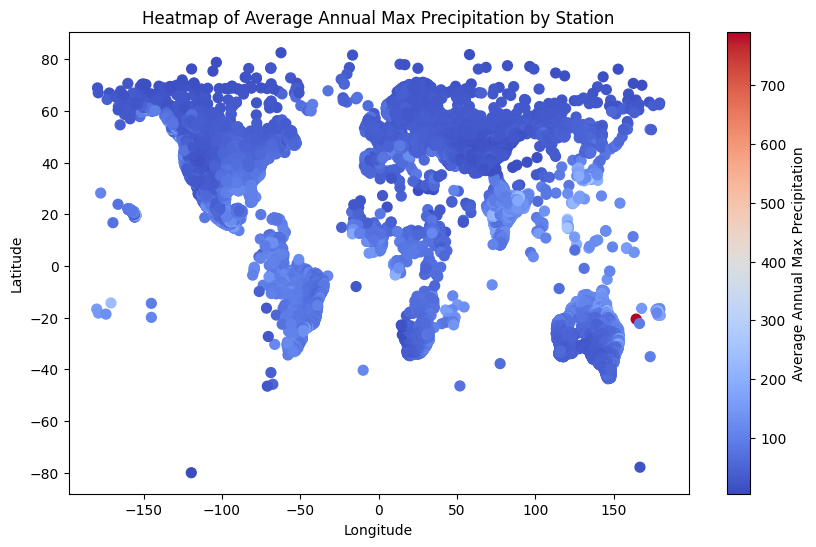

In [4]:
# Average annual maxima per station for mapping
station_avg = data.groupby("ID").agg({
    "MAX.PRCP": "mean",
    "LAT": "first",
    "LON": "first"
}).reset_index()

# Plotting a heatmap
plt.figure(figsize=(10, 6))
plt.scatter(station_avg["LON"], station_avg["LAT"], c=station_avg["MAX.PRCP"], cmap="coolwarm", s=50)
plt.colorbar(label="Average Annual Max Precipitation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Average Annual Max Precipitation by Station")
plt.show()

### 4. Extreme Value Analysis (Return Period Estimation)
This code estimates the return period for extreme precipitation events using the Gumbel distribution.

In [7]:
from scipy.stats import gumbel_r

# Initialize list for return period results
return_periods = []

# Fit the Gumbel distribution to annual maxima for each station
for station, group in data.groupby("ID"):
    max_prcp_values = group["MAX.PRCP"].dropna()

    # Proceed only if there are valid values
    if len(max_prcp_values) > 0:
        params = gumbel_r.fit(max_prcp_values)
        ten_year_return = gumbel_r.ppf(0.9, *params)  # 10-year event
        fifty_year_return = gumbel_r.ppf(0.98, *params)  # 50-year event
        return_periods.append([station, ten_year_return, fifty_year_return])

# Create a DataFrame to display return period estimates
return_period_df = pd.DataFrame(return_periods, columns=["ID", "10-Year Return", "50-Year Return"])
print("Return Periods for Extreme Events by Station:")
print(return_period_df)

Return Periods for Extreme Events by Station:
                ID  10-Year Return  50-Year Return
0      AEM00041218       42.644059       63.722950
1      AG000060680       29.985165       43.162825
2      AGE00135039       61.533211       83.189816
3      AGE00147704       66.757218       84.824947
4      AGE00147705       82.755487      108.729944
...            ...             ...             ...
39201  ZI000067889      121.107538      158.576803
39202  ZI000067965       86.219654      113.742554
39203  ZI000067969      100.431064      137.901359
39204  ZI000067977      115.490921      155.846265
39205  ZI000067991       86.125788      112.951982

[39206 rows x 3 columns]


### 5. Box Plot for a Sample of Stations
This method involves selecting a random sample of stations to create a cleaner plot.

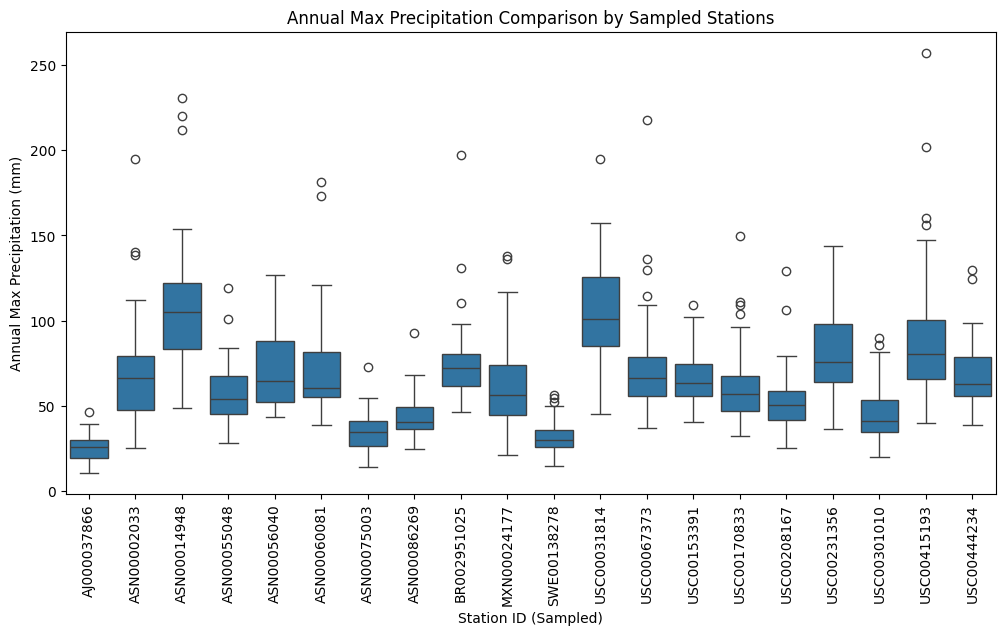

In [9]:
# Sample 20 random stations to avoid overcrowding the plot
sampled_stations = np.random.choice(data["ID"].unique(), size=20, replace=False)
sampled_data = data[data["ID"].isin(sampled_stations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=sampled_data, x="ID", y="MAX.PRCP")
plt.xlabel("Station ID (Sampled)")
plt.ylabel("Annual Max Precipitation (mm)")
plt.title("Annual Max Precipitation Comparison by Sampled Stations")
plt.xticks(rotation=90)
plt.show()
